<a href="https://colab.research.google.com/github/sarahrdk/EscapeEarth/blob/main/Interns/Sarah/How_to_recover_a_known_planet_in_Kepler_data%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lightkurve

In [2]:
#download pixel data from kepler's observing quarters
import lightkurve as lk
tpf = lk.search_targetpixelfile("Kepler-10", quarter=3).download()

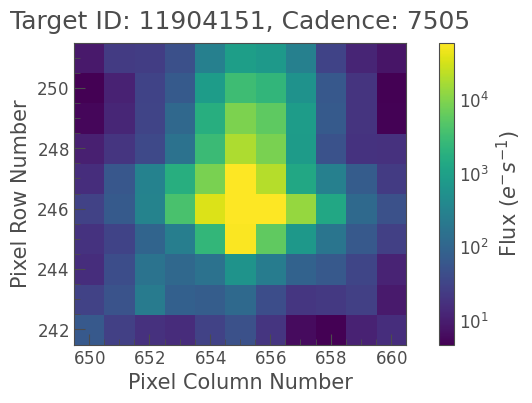

In [3]:
#Let’s use the plot method to show the pixel data at one point in time (frame index 100). 
#We’ll also pass along a few plotting arguments.
tpf.plot(frame=100, scale='log', show_colorbar=True);

In [4]:
#create a simple aperture photometry lightcurve 
#using the mask defined by the pipeline stored in tpf.pipeline_mask
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

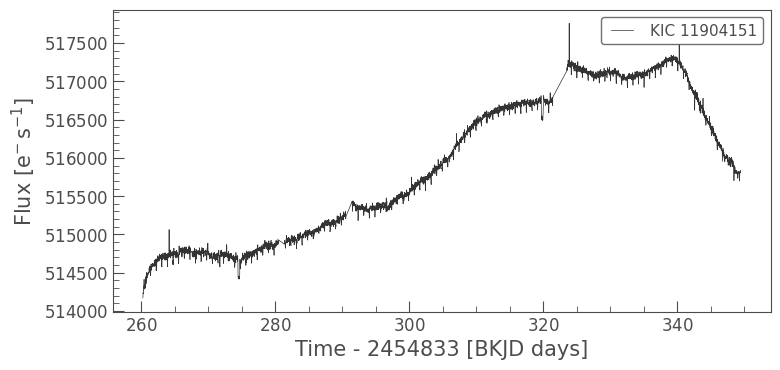

In [5]:
#look at the output curve
lc.plot();

In [6]:
#removes long-term variability that we are not interested in using a high-pass filter called Savitzky-Golay
flat, trend = lc.flatten(window_length=301, return_trend=True)

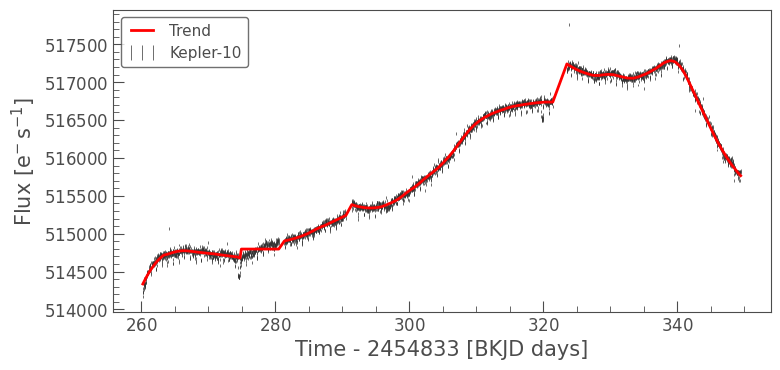

In [7]:
ax = lc.errorbar(label="Kepler-10")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes

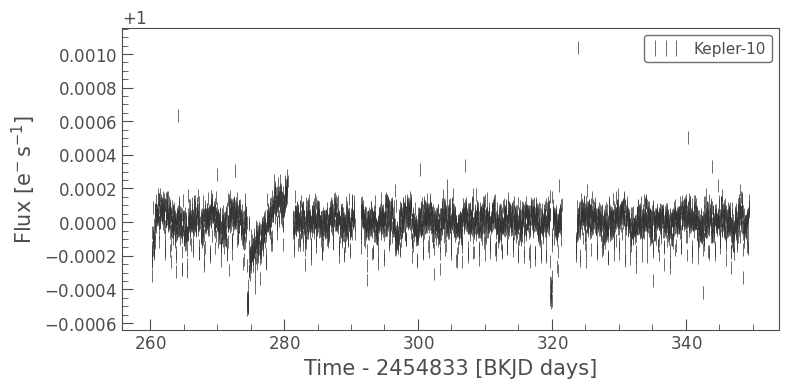

In [8]:
flat.errorbar(label="Kepler-10");

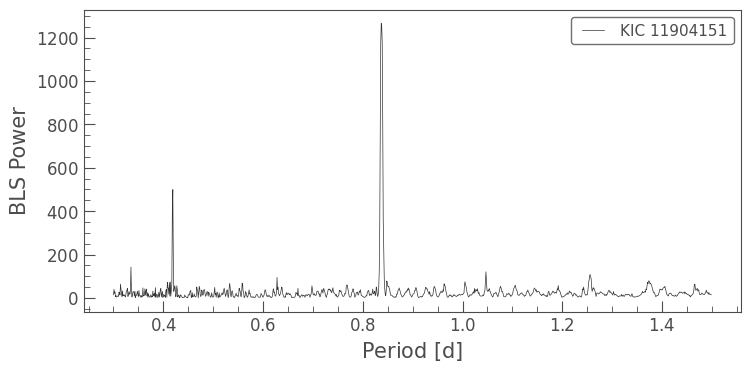

In [9]:
#use the BLS algorithm to search a pre-defined grid of transit periods
import numpy as np
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.3, 1.5, 0.001))
periodogram.plot();

In [10]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 0.837 d


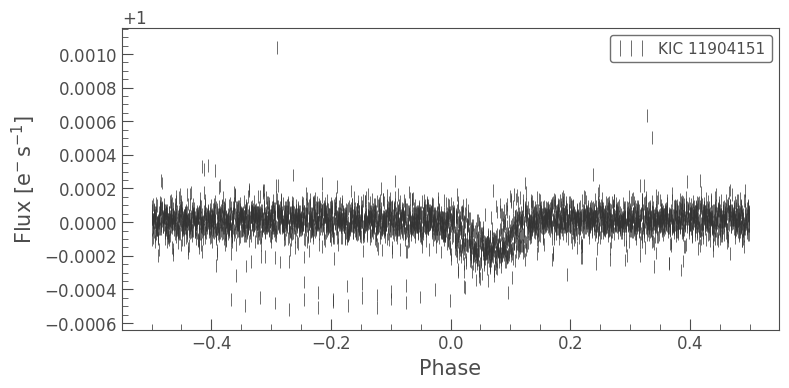

In [11]:
flat.fold(period=best_fit_period, t0=periodogram.transit_time_at_max_power).errorbar();